In [1]:
from helpers import *
import numpy as np

np.random.seed(101)

/scratch/fstella/felix/bursts_CA1/helpers.py:704: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


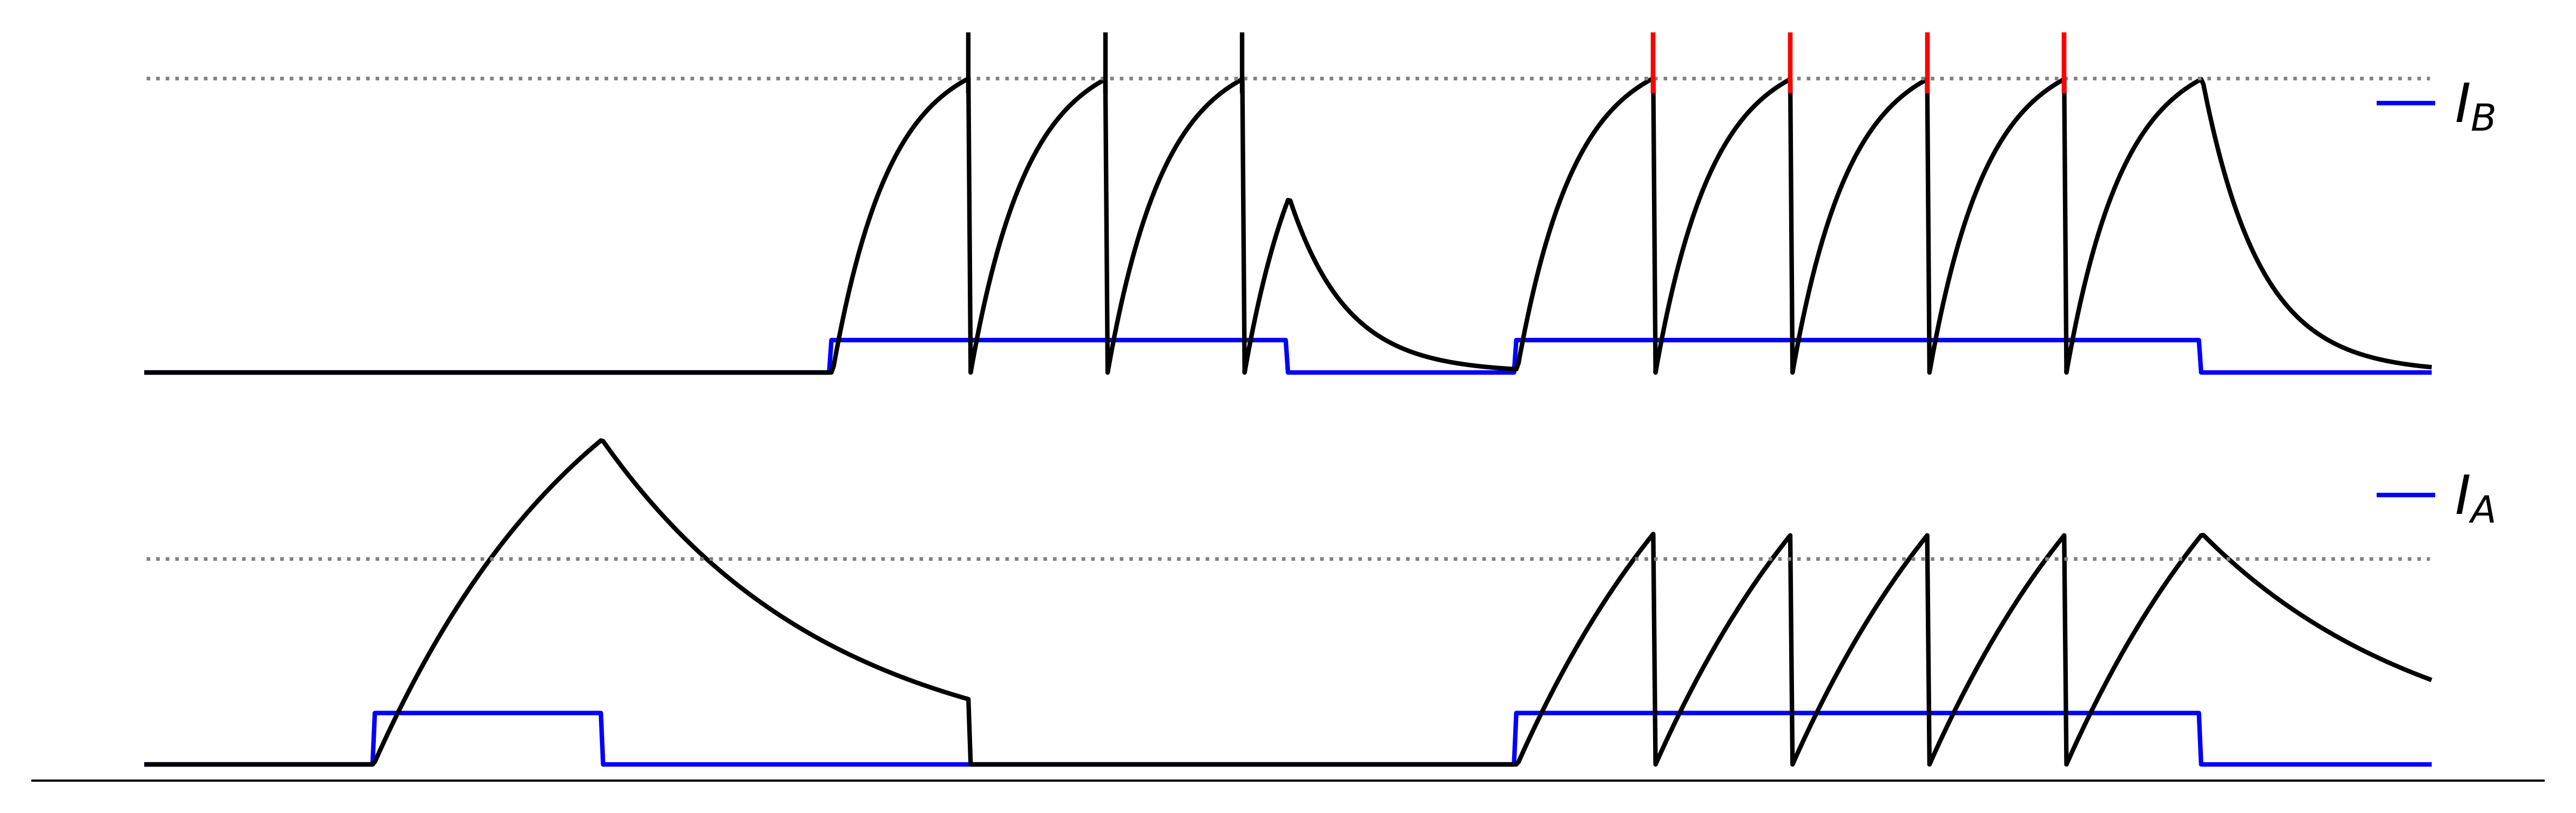

In [2]:
## Plot example dynamics of two-compartment model
ca1, t = run_one_neuron()
create_plot_one_neuron(ca1, t)

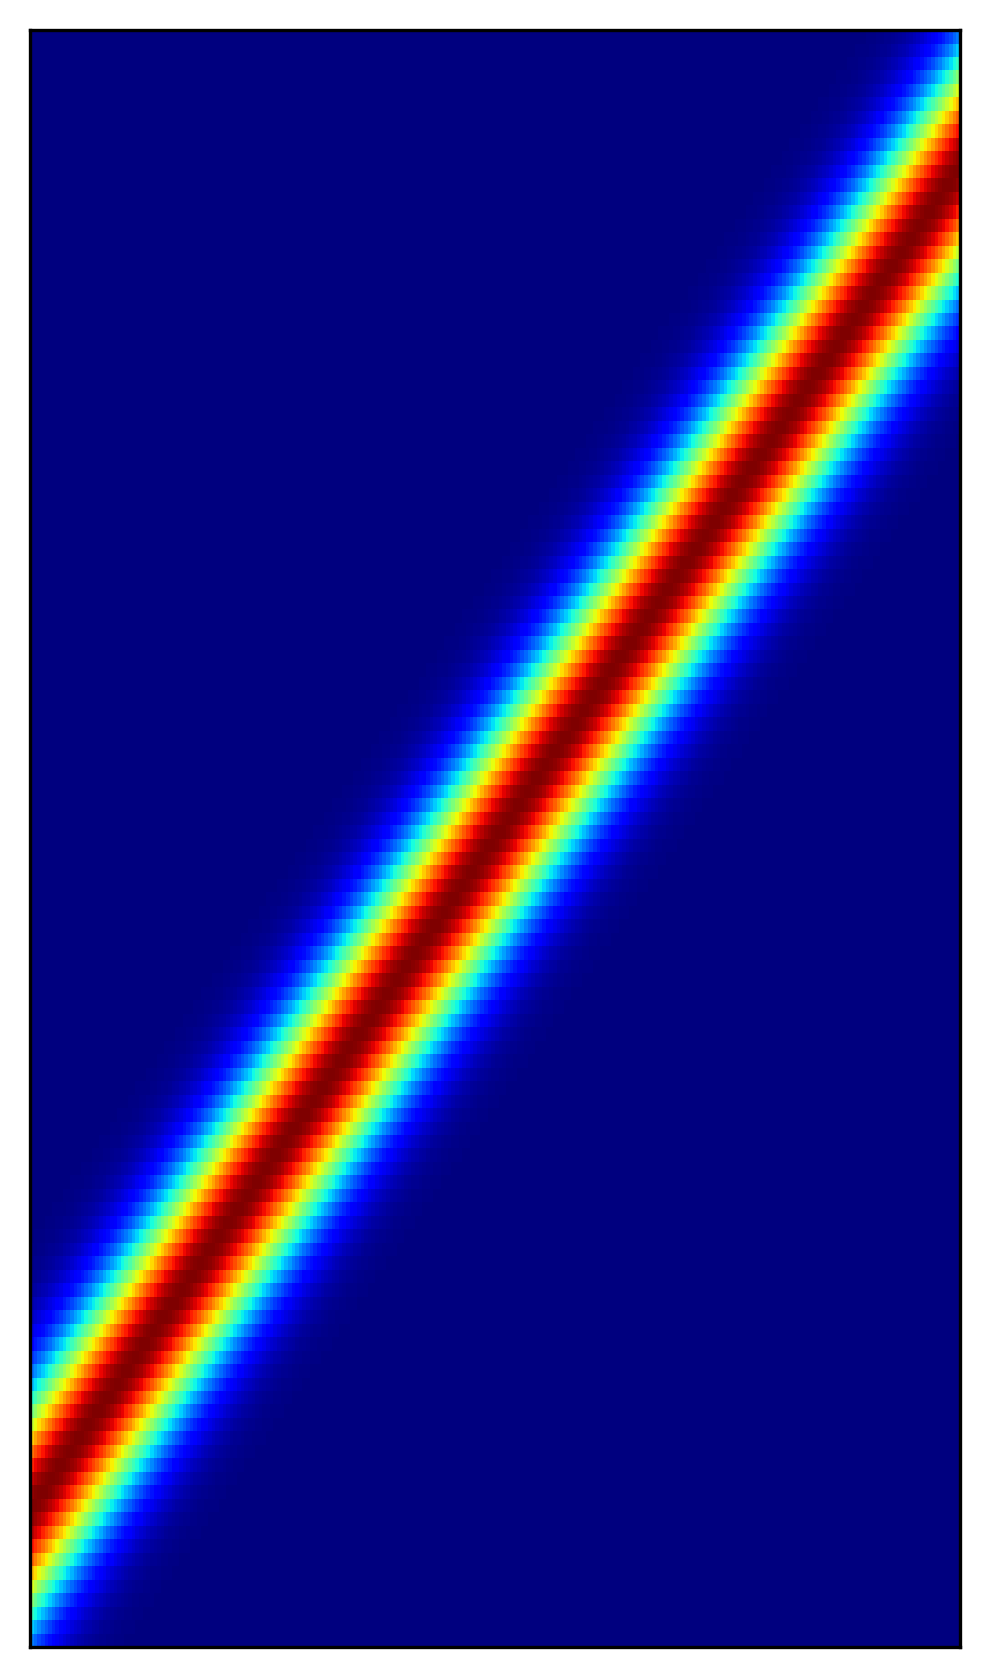

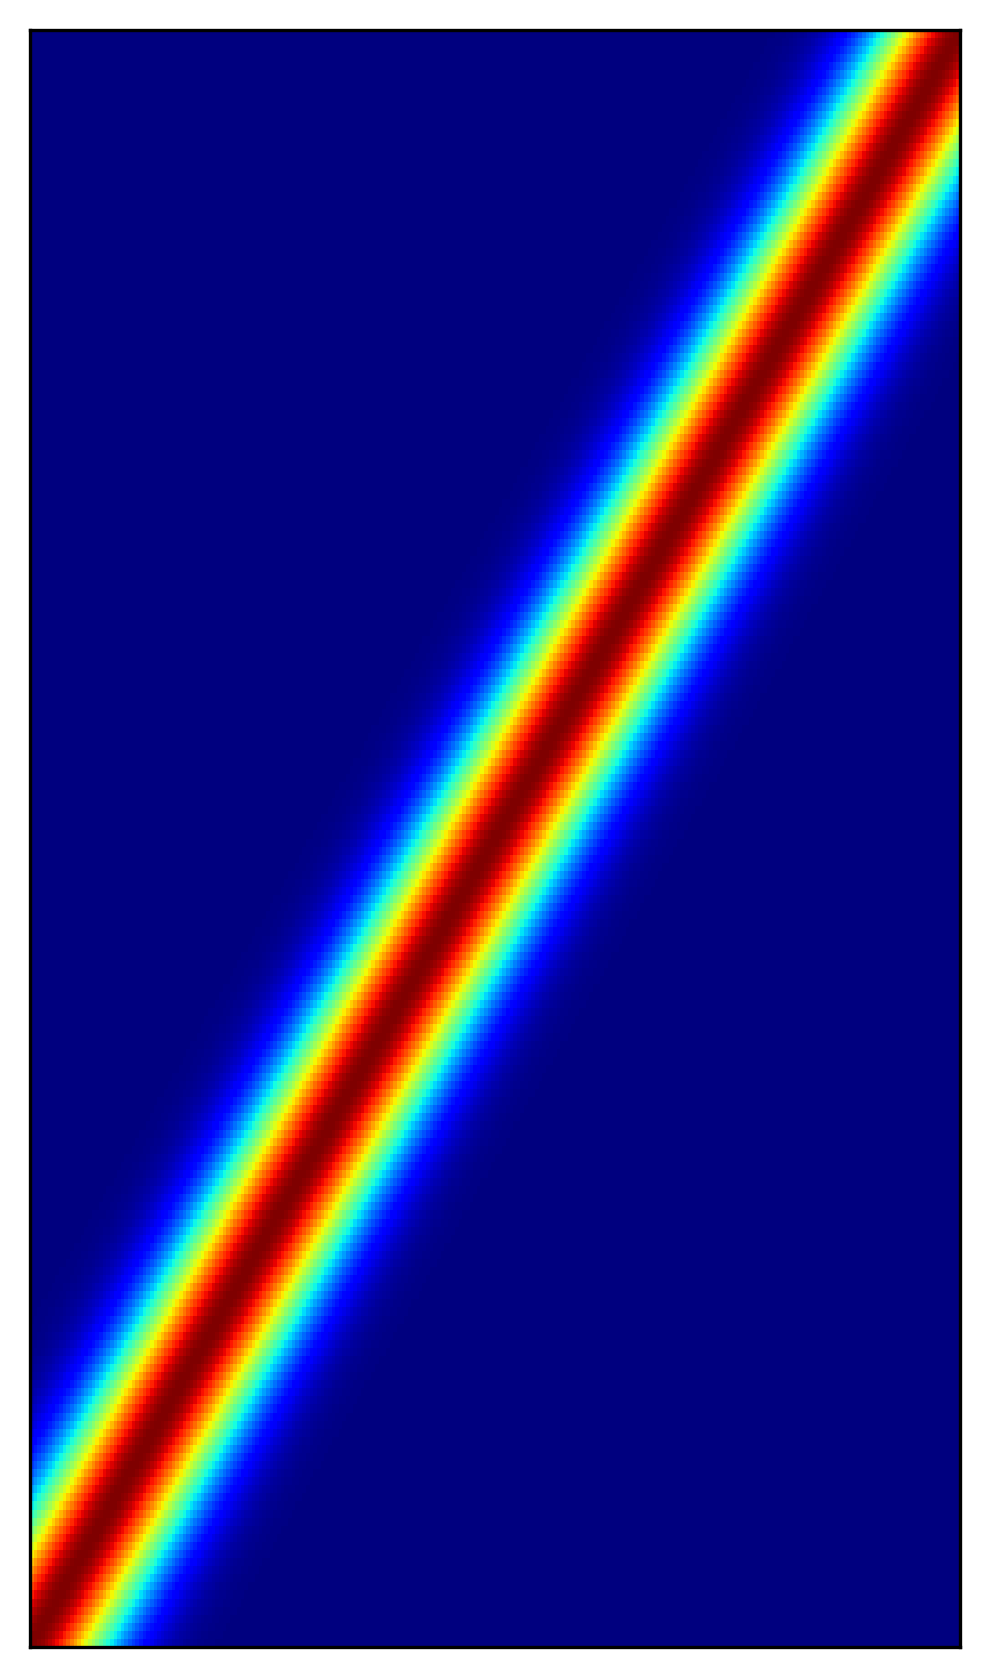

In [ ]:
## plot CA3 and EC activities sorted by their respective place field centres

ca1 = PyramidalCells(
    N_CELLS['1D'],
    len_edge=LEN_TRACK_1D,
    n_dim = 1,
    seed=101
)

fig, ax = plt.subplots(1, 1, figsize=(4, 7), dpi=300)
act_ca3 = ca1.get_input_map(area='CA3', env=0, a=0)
sort_TD = np.argsort(ca1.m_CA3)
sorted_fr = act_ca3[np.ix_(sort_TD, np.arange(act_ca3.shape[1]))]
plot_firing_rates(ax, sorted_fr, '', vmin=None, vmax=None, fontsize=12, con='')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(4, 7), dpi=300)
act_EC = ca1.get_input_map(area='EC', env=0, a=0)
sort_TD = np.argsort(ca1.m_EC)
sorted_fr = act_EC[np.ix_(sort_TD, np.arange(act_EC.shape[1]))]
plot_firing_rates(ax, sorted_fr, '', vmin=None, vmax=None, fontsize=12, con='')
plt.show()


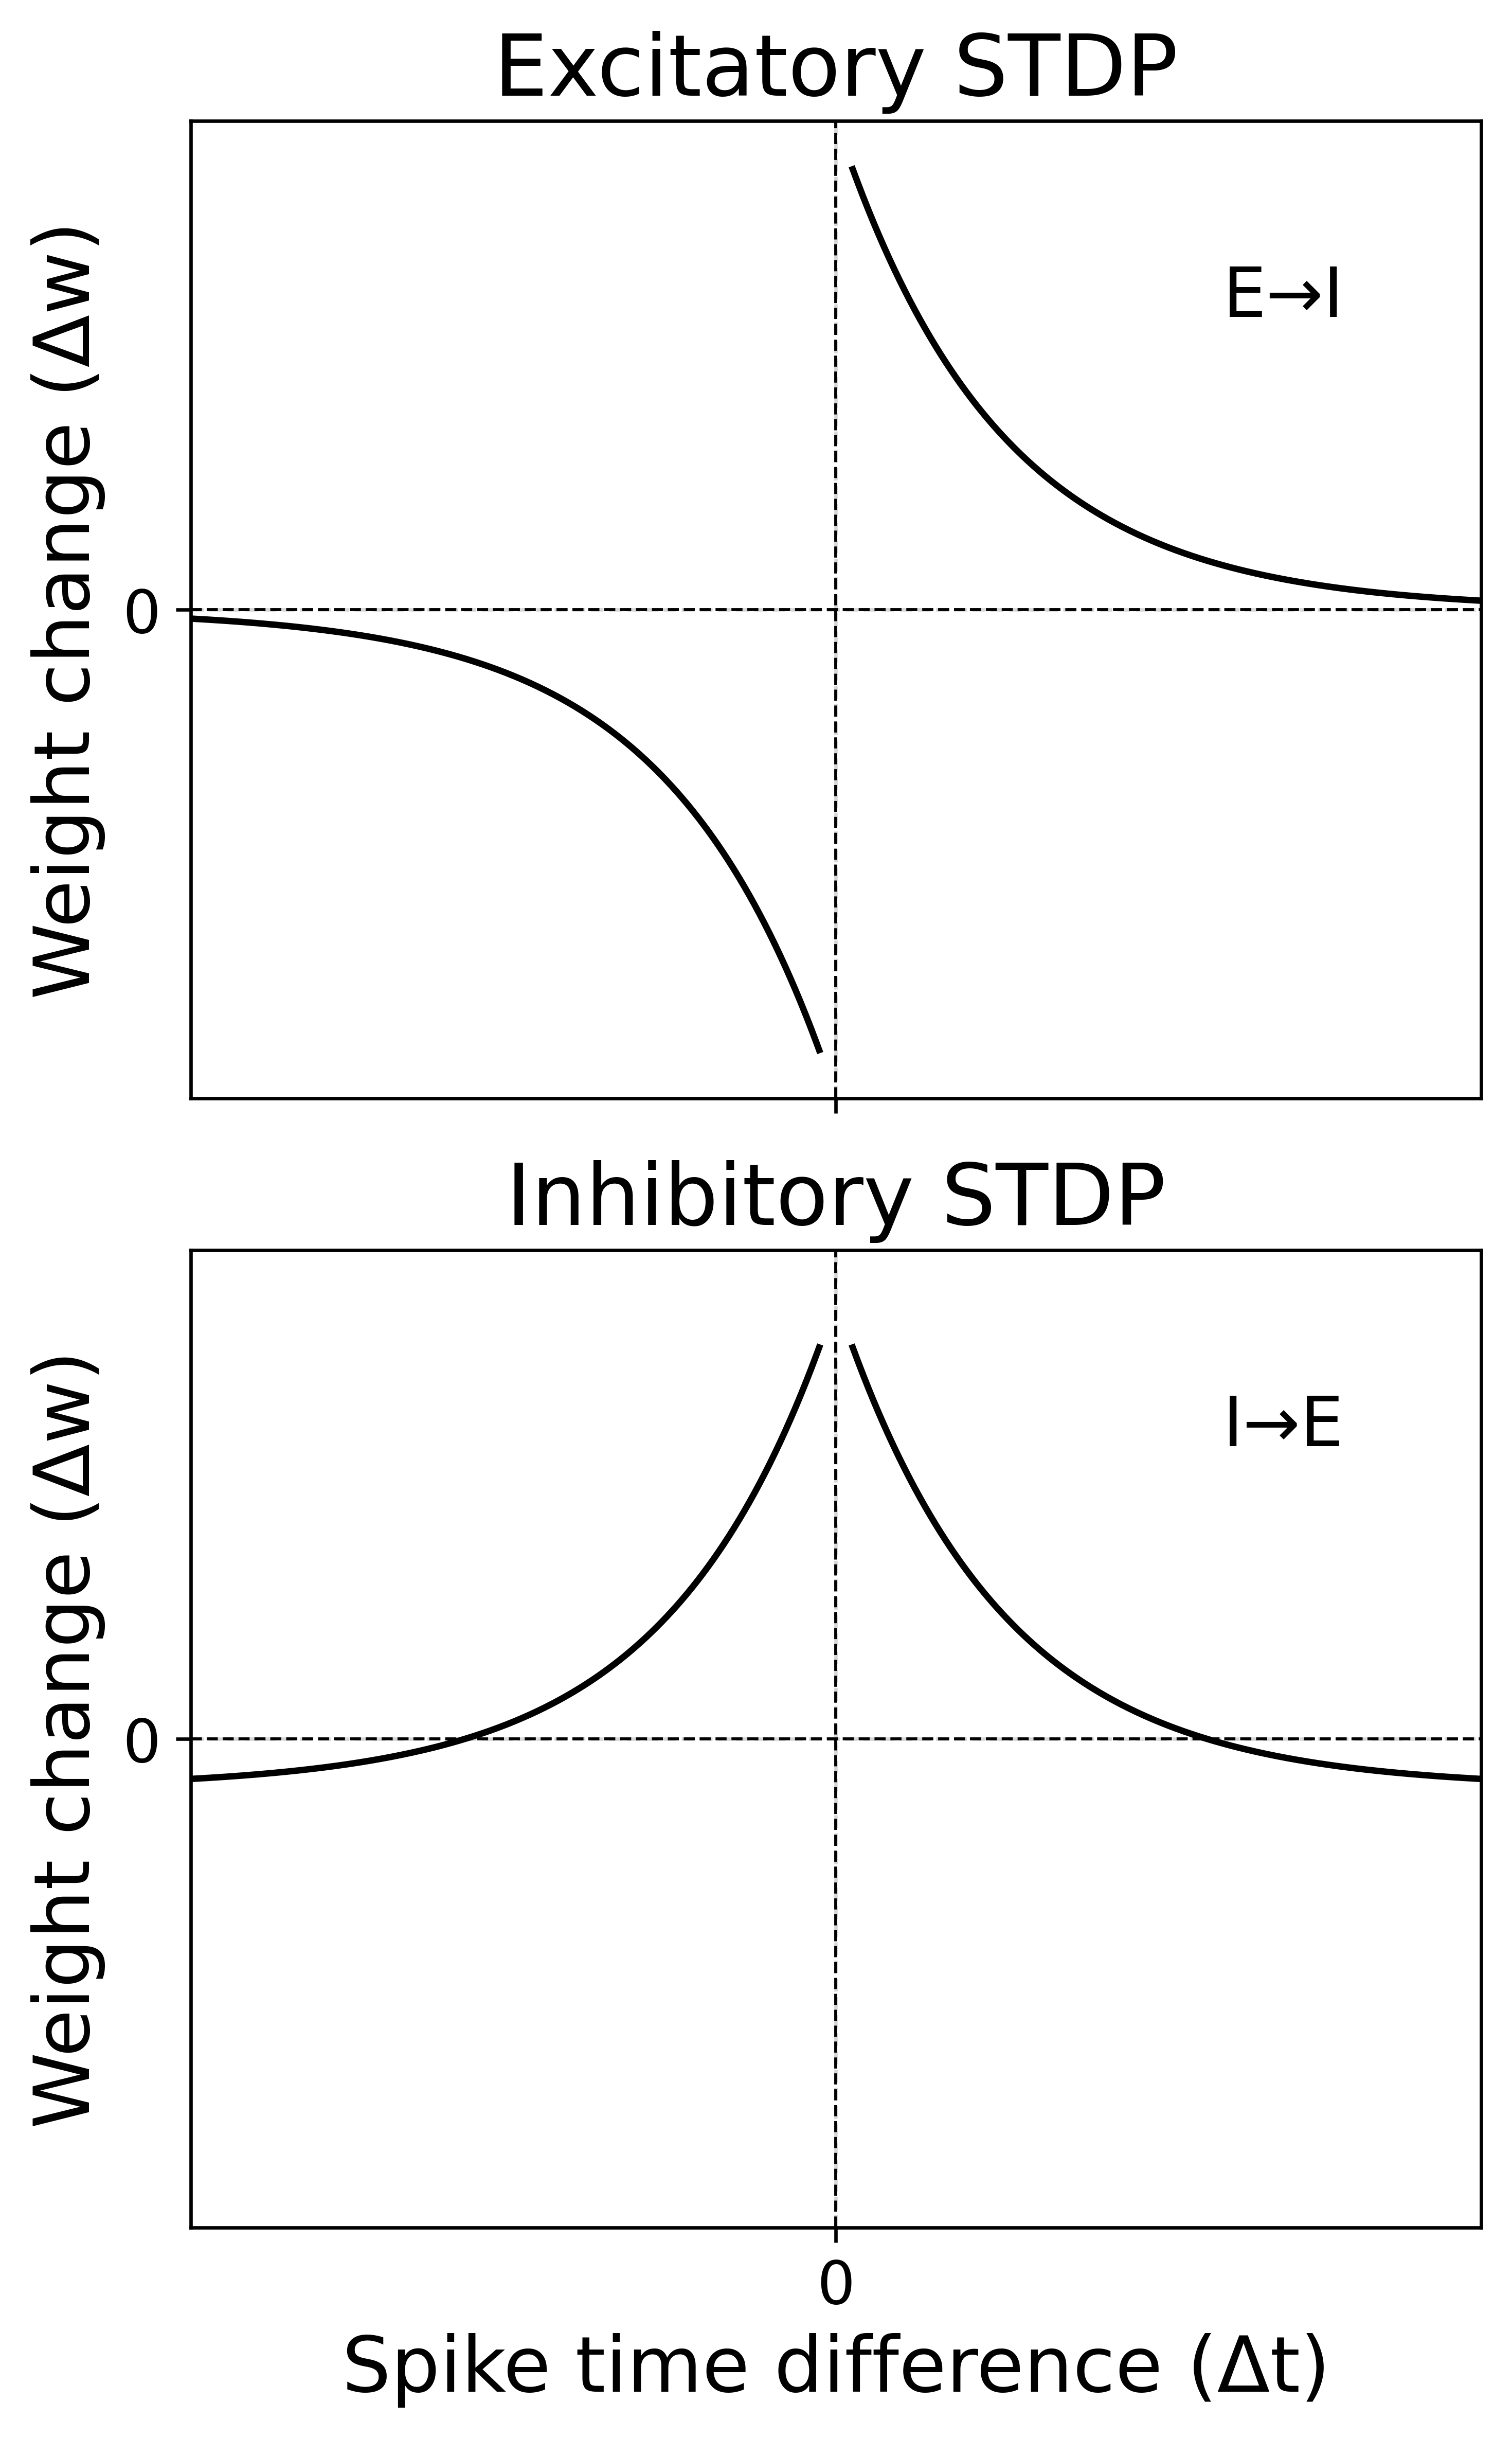

In [8]:
### plot iSTDP rule

delta_t = np.linspace(-100, 100, 500)
delta_t = delta_t[np.abs(delta_t) > 2.5]  

# Example parameters for visualization 
tau_E = 25.0  
tau_I = 25.0  

# Excitatory STDP: classic exponential curve
def stdp_excitatory(dt):
    return np.where(dt > 0,
                     np.exp(-dt / tau_E),
                    -np.exp(dt / tau_E))

# Inhibitory STDP: symmetric 
def stdp_inhibitory(dt):
    return np.exp(-np.abs(dt) / tau_I) - 0.1

# Compute curves
dw_E = stdp_excitatory(delta_t)
dw_I = stdp_inhibitory(delta_t)

fig, axs = plt.subplots(2, 1, figsize=(5, 8), sharex=True, dpi=600)

# Excitatory STDP: split into negative and positive halves
neg_dt = delta_t[delta_t < 0]
pos_dt = delta_t[delta_t > 0]
dw_E_neg = stdp_excitatory(neg_dt)
dw_E_pos = stdp_excitatory(pos_dt)

axs[0].plot(neg_dt, dw_E_neg, color='black')
axs[0].plot(pos_dt, dw_E_pos, color='black')
axs[0].axhline(0, color='k', linestyle='--', linewidth=0.7)
axs[0].axvline(0, color='k', linestyle='--', linewidth=0.7)
axs[0].set_title('Excitatory STDP', fontsize=20)
axs[0].text(60, 0.6, 'E→I', fontsize=16)

# Inhibitory STDP: symmetric, so we still split it for clean break
dw_I_neg = stdp_inhibitory(neg_dt)
dw_I_pos = stdp_inhibitory(pos_dt)

axs[1].plot(neg_dt, dw_I_neg, color='black')
axs[1].plot(pos_dt, dw_I_pos, color='black')
axs[1].axhline(0, color='k', linestyle='--', linewidth=0.7)
axs[1].axvline(0, color='k', linestyle='--', linewidth=0.7)
axs[1].set_xlabel('Spike time difference (Δt)', fontsize=18)
axs[1].set_title('Inhibitory STDP', fontsize=20)
axs[1].text(60, 0.6, 'I→E', fontsize=16)

for ax in axs:
    ax.set_xlim(-100, 100)
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xticklabels(['0'], fontsize=14)
    ax.set_yticklabels(['0'], fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylim(-1., 1.)
    ax.set_ylabel('Weight change (Δw)', fontsize=18)

plt.tight_layout()
plt.show()
